# Lab 02 : Numerical and Categorical Data Handling


#### Lab Overview

This workshop focuses on data handling and preparation in case of a dataset consisting of numerical and categorical features.

---

#### Objective

By the end of this lab, you will be able to:

1. Apply common EDA methods on tabular data.
2. Use data preparation methods on raw tabular data (e.g., data cleaning and transformation).
3. Perform statitical analysis on tabular data.

---


#### Tabular Data Problem Overview

##### Hands-on Task:

Write a brief description of a business problem that can be addressed using the given dataset. Include a possible case scenario where the raw data presents challenges, and explain how you would address and resolve these issues.


---

#### Data Understanding and Exploration

##### Dataset overview

Load and inspect the data. <br>
Understand the features and their types. <br>

##### Data analysis

_Univariate analysis_ <br>

1. Histograms: To visualize the frequency distribution of a numerical feature or target. Bins group the data range into intervals. The height of each bar represents the count of values within that range.
2. Boxplots: To identify the spread, central tendency (median), and presence of outliers in a numerical feature. The box shows the interquartile range (IQR), the line inside represents the median, and whiskers extend to 1.5 times the IQR. Points outside whiskers are outliers.
3. Barplot: To display the frequency or proportion of each category in a categorical variable. Categories are represented along the x-axis, and the frequency/proportion is on the y-axis.

_Multivariate analysis_ <br>

1. Scatter plots: To visualize pairwise relationships between two numerical features. Each point represents an observation, with the x and y coordinates corresponding to the values of two features. Trends or clusters may indicate relationships.
2. Correlation matrix: To quantify linear relationships between numerical features. Displays a table of correlation coefficients (values range from -1 to 1). Positive values indicate direct relationships, while negative values indicate inverse relationships.
3. Boxplots: To compare the distribution of a numerical variable across different categories. Each box represents the numerical data distribution for a single category.


---

#### Data Preparation

##### Data Cleaning

Handling missing data by identifying and either removing or imputing them. <br>
Removing duplicates <br>
Handling outliers by detecting them and then treating (e.g. transformation, capping, dropping...) <br>
Standerdizing data (e.g. data type, incorrect or inconsistent data)

##### Data Transformation

Apply feature scaling for numeric data (normalize, handle inconsistent units...) <br>
Encoding categorical variables (ordinal or one hot encoding) <br>
Combining or splitting columns


---

#### Statistical Analysis

| Test                                  | Description                                                                                                  | Applicable Columns                              | How Many Columns                                | How to Identify Dependence                                                            | Constraints                                                                                                                   | Python Function                                                                                                     |
| ------------------------------------- | ------------------------------------------------------------------------------------------------------------ | ----------------------------------------------- | ----------------------------------------------- | ------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------- |
| **Correlation (Pearson Correlation)** | Measures the strength and direction of a linear relationship between two numerical variables.                | **Numerical Columns** (integer or float)        | Any pair of numerical columns                   | High absolute correlation suggests high dependecy                                     | - Assumes linearity<br>- Sensitive to outliers                                                                                | `df.corr()` (for correlation matrix)<br>`df['col1'].corr(df['col2'])` (for pairwise correlation)                    |
| **Chi-Square Test**                   | Evaluates if two categorical variables are independent.                                                      | **Categorical Columns** (discrete values)       | Two categorical columns                         | if p-value < 0.05 then compared entities are dependent                                | - Expected frequency should be > 5 for every category in the column<br>- Categories must be mutually exclusive and exhaustive | - chi-test: `scipy.stat.chi2_contingency(data)` <br> - contingency table: `pandas.crosstab(df['col1'], df['col2'])` |
| **ANOVA (Analysis of Variance)**      | Tests if there is a significant difference in the means of a numerical variable across different categories. | **Numerical Column** and **Categorical Column** | One numerical column and one categorical column | if p-value > 0.05 then compared categorical values have no effect on numerical column | - Assumes normality of data<br>- Homogeneity of variance<br>- Observations should be independent                              | `scipy.stat.f_oneway(df[df['category'] == 'cat1']['num_col'], df[df['category'] == 'cat2']['num_col'])`             |


---

#### Hands-on Activity

For the assigned dataset perform the following tasks: <br>
**Task 1** : Provide a data overview on the given dataset overall and column wise. <br>
**Task 2** : Do univariate analysis on all features and target variable. <br>
**Task 3** : Do multivariate analysis on every feature with the selected target variable. <br>
**Task 4** : Identify feature to feature relationships using multivariate analysis. <br>
**Task 5** : Apply data transformation for all necessary columns <br>
**Task 6** : Reapply data visualization for figures containing modified columns. <br>
**Task 7** : Compute statistical analysis on columns that could have dependence and derive a conclusion based on test results including what columns might require to be dropped<br>
**Task 8** : Save preprocessed dataset **without** dropping columns based on statistical analysis

##### Note the following:

- When necessary display/add briefly the logic/reasoning of a data procedure done.
- Write clean code, allocate at least 1 code block for each task.


In [2]:
# task 1
import pandas as pd

df = pd.read_csv("data\lab_02_A.csv")
display(df)
df.info()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [34]:
dfNew = pd.read_csv("data\lab_02_A_cleaned")
dfNew["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [33]:


df.loc[df['income'] == "<=50K.", 'income'] = "<=50K"

df.loc[df['income'] == ">50K.", 'income'] = ">50K"
df.to_csv("data\lab_02_A_cleaned", index=False)

<Axes: title={'center': 'age'}>

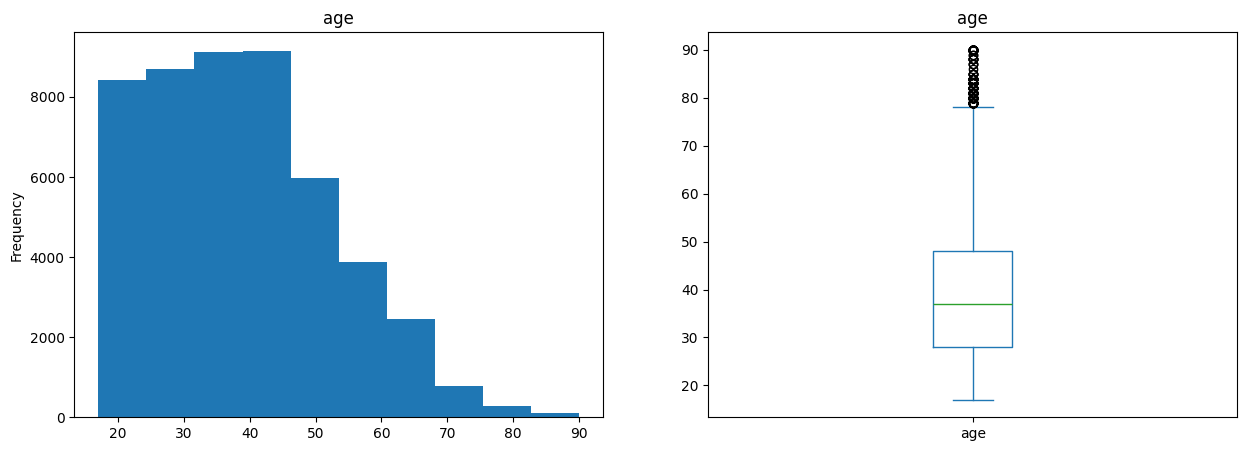

In [3]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df["age"].plot(kind='hist', ax=axs[0], title="age")
df["age"].plot(kind='box', ax=axs[1], title="age")


In [24]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


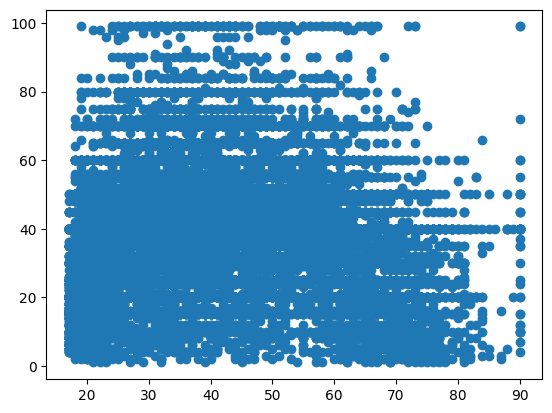

In [36]:
#task 3 income vs age
plt.scatter(df["age"], df["hours-per-week"])



In [42]:
dataframe = pd.DataFrame(df, columns=['age', 'hours-per-week' ])

matrix = dataframe.corr()
display(matrix)

pairwise = df['age'].corr(df['hours-per-week'])
display(pairwise)

,age,hours-per-week
age,1.000000,0.071558
hours-per-week,0.071558,1.000000


np.float64(0.0715583385269828)